- By now, you are probably a little tired of Is and Os and keeping track of 0001 meaning `ADD` and 1001 meaning `NOT`.
- Also, wouldn't it be nice if we could refer to a memory location by some meaningful symbolic name instead of memorizing its 16-bit address?
- And wouldn't it be nice if we could represent each instruction in some more easily comprehensible way, instead of having to keep track of which bit of the instruction conveys which individual piece of information about the instruction. It turns out that help is on the way. 

In this chapter, we introduce assembly language, a mechanism that does all that, and more.

## 7.1 Assembly Language Programming—Moving Up a Level 
Recall: levels of transformation identified
- Algorithms are transformed into programs described in some mechanical language.
- This mechanical language can be the machine language of a particular computer.
- Recall that a program is in a computer's machine language if every instruction in the program is from the ISA of that computer. 

On the other hand, the mechanical language can be more user-friendly. We generally partition mechanical languages into two classes, high-level and lowlevel

Instructions in a high-level language almost (but not quite) resemble statements in a natural language such as English.

High-level languages tend to be ISA independent.
- That is, once you learn how to program in C, etc for one ISA, it is a small step to write programs in C (or Fortran or Pascal) for another ISA

Before a program written in a high-level language can be executed, it must be translated into a program in the ISA of the computer on which it is expected to execute

It is usually the case that each statement in the high-level language specifies several instructions in the ISA of the computer.

In this chapter, however, we will only move up a small notch from the ISA we dealt with in Chapter 5. 

A small step up from the ISA of a machine is that ISA's assembly language. Assembly language is a low-level language. Each assembly language instruction usually specifies a single instruction in the ISA.

Unlike high-level languages, which are usually ISA independent, low-level languages are very much ISA dependent. In fact, it is usually the case that each ISA has only one assembly language.  

The purpose of assembly language is to make the programming process more user-friendly than programming in machine language (i.e., the ISA of the computer with which we are dealing), while still providing the programmer with detailed control over the instructions that the computer can execute. 
- we are freed from having to remember what opcode is 0001 and what opcode is 1001, or what is being stored in memory location 0011111100001010 and what is being stored in location 0011111100000101.
- Assembly languages let us use mnemonic devices for opcodes, such as ADD and NOT, and they let us give meaningful symbolic names to memory locations, such as SUM or PRODUCT, rather than use their 16-bit addresses.
- This makes it easier to differentiate which memory location is keeping track of a SUM and which memory location is keeping track of a PRODUCT. We call these names **symbolic addresses**.

## 7.2 An Assembly Language Program 
**EG:** The program in Figure 7.1 multiplies the integer intially stored in NUMBER by 6 by adding the integer to itself six times.

Ten lines start with a semicolon, designating that they are strictly for the benefit of the human reader. More on this momentarily. Seven lines (06, 07, 08, 0C, 0D, OE, and 10) specify assembly language instructions to be translated into machine language instructions of the LC-3, which will actually be carried out when the program runs.

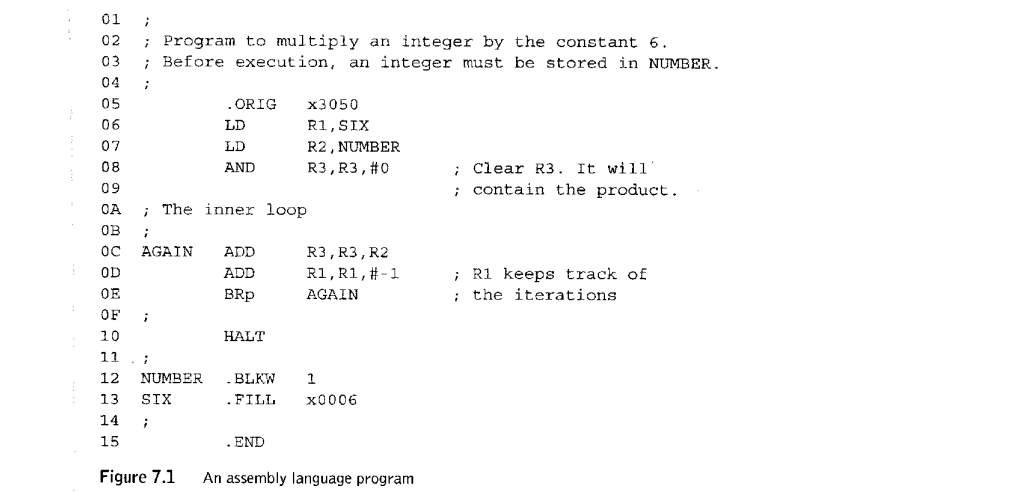

The remaining four lines (05, 12, 13, and 15) contain **pseudo-ops**, which are messages from the programmer to the translation program to help in the translation process. 

The translation program is called an **assembler** (in this case the LC-3 assembler), and the translation process is called **assembly**.

### 7.2.1 Instructions 
Instead of an instruction being 16 0s and Is, as is the case in the LC-3 ISA, **an instruction in assembly language consists of four parts:**

    LABEL OPCODE OPERANDS ; COMMENTS

**LABEL and COMMENTS are optional**

#### Opcodes and Operands 
An instruction must have an OPCODE (the thing the instruction is to do), and the appropriate number of OPERANDS (the things it is supposed to do it to).

The OPCODE is a symbolic name for the opcode of the corresponding LC-3 instruction. 
- it is easier to remember an operation by the symbolic name ADD, AND, or LDR than by the 4-bit quantity 0001, 0101, or 0110.

The number of operands depends on the operation being performed. For example, the ADD instruction (line 0C) requires three operands (two sources to obtain the numbers to be added, and one destination to designate where the result is to be placed). All three operands must be explicitly identified in the instruction.

    AGAIN ADD R3 , R3 , R

- The operands to be added are obtained from register 2 and from register 3.
- The result is to be placed in register 3.
- We represent each of the registers 0 through 7 as R0,R1,R2,...,R7.

memory locations will be given symbolic addresses called labels. In this case, the location from which the value is to be read is given the label NUMBER. The destination into which the value is to be loaded is register 2.
    
    LD R2, NUMBER

#### Labels
Labels are symbolic names that are used to identify memory locations that are referred to explicitly in the program.

There are two reasons for explicitly referring to a memory location.
1. The location contains the target of a branch instruction (for example, AGAIN in line 0C).
2. The location contains a value that is loaded or stored (for example, NUMBER, line 12, and SIX, line 13).

The location AGAIN is specifically referenced by the branch instruction in line OE.

    BRp AGAIN

#### Comments
They have no effect on the translation process and indeed are not acted on by the LC-3 assembler. 

They are identified in the program by **semicolons**.

### 7.2.2 Pseudo-ops (Assembler Directives)
Pseudo-ops are helpful to the assembler in performing that task.

Actually, a more formal name for a pseudo-op is assembler directive.

They are called pseudo-ops because they do not refer to operations that will be performed by the program during execution. Rather, **the pseudo-op is strictly a message to the assembler to help the assembler in the assembly process**. 

Once the assembler handles the message, the pseudo-op is discarded. 

**The LC-3 assembler contains five pseudo-ops: .ORIG, .FILL, .BLKW, .STRINGZ, and .END**. 

All are easily recognizable by the dot as their first character. 

**`.ORIG`**
- Specifies the starting address of the program in memory.
- **Example**: `.ORIG x3050` places the program's first instruction at memory location `x3050`.

**`.FILL`**
- Reserves a memory location and initializes it with a specific value.
- **Example**: `.FILL x0006` sets a location's value to `x0006`.

**`.BLKW`**
- Reserves a block of sequential memory locations.
- **Example**: `.BLKW 1` reserves one memory location, useful for dynamic data like a keyboard input.
- Often used when the value to be stored is not known at assembly time.

**`.STRINGZ`**
- Initializes a sequence of memory locations with ASCII codes of a string, followed by a null terminator (`x0000`).
- **Example**:
  ```assembly
  HELLO .STRINGZ "Hello, World!"
- Initializes memory starting at x3010 with ASCII values for each character in the string, ending with x0000.

**`.END`**
- Marks the end of the source code for the assembler.
- It does not affect program execution and serves as a delimiter.

**These pseudo-operations guide the assembler in allocating and initializing memory but do not generate executable instructions.**

## 7.3 The Rssemblq Process
### 7.3.1 Introduction
Before an LC-3 assembly language program can be executed, it must first be translated into a machine language program, that is, one in which each instruction is in the LC-3 ISA. It is the job of the LC-3 assembler to perform that translation.

If you have available an LC-3 assembler, you can cause it to translate your assembly language program into a machine language program by executing an appropriate command. 

In the LC-3 assembler that is generally available via the Web, that command is assemble and requires as an argument the filename of your assembly language program. For example, if the filename is solution1.asm, then

    assemble solutionl.asm outfile

produces the file `outfile`, which is in the ISA of the LC-3.

### 7.3.2 A Two-Pass Process 
In this section, we will see how the assembler goes through the process of translating an assembly language program into a machine language program.

You remember that there is in general a one-to-one correspondence between instructions in an assembly language program and instructions in the final machine language program.

The assembly process is done in two complete passes (from beginning to .END) through the entire assembly language program.
The objective of the first pass is to identify the actual binary addresses corresponding to the symbolic names (or labels). This set of correspondences is known as the symbol table. 
- In pass 1, we construct the symbol table. 
- In pass 2, we translate the individual assembly language instructions into their corresponding machine language instructions. 

### 7.3.3 The First Pass: Creating the Symbol Table 
For our purposes, the symbol table is simply a correspondence of symbolic names with their 16-bit memory addresses.

We obtain these correspondences by passing through the assembly language program once, noting which instruction is assigned to which address, and identifying each label with the address of its assigned entry. 

A symbol table entry is constructed, as follows: 

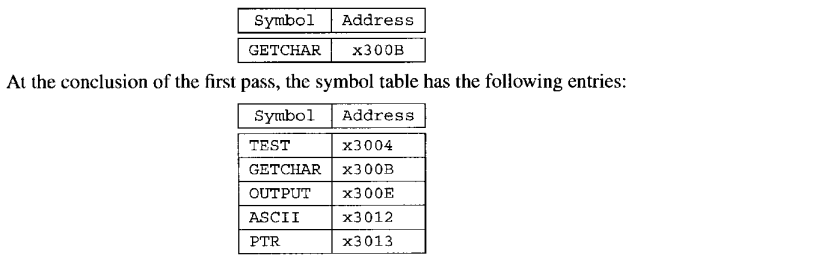

### 7.3.4 The Second Pass: Generating the Machine Language Program 
The second pass consists of going through the assembly language program a second time, line by line, this time with the help of the symbol table. At each line, the assembly language instruction is translated into an LC-3 machine language instruction.

This time, when the assembler gets to line 0C, it can completely assemble the instruction since it knows that PTR corresponds to x3013. The instruction is LD, which has an opcode encoding of 0010. The destination register (DR) is R3, that is, 011.

The resulting translated program is shown in Figure 7.3. 

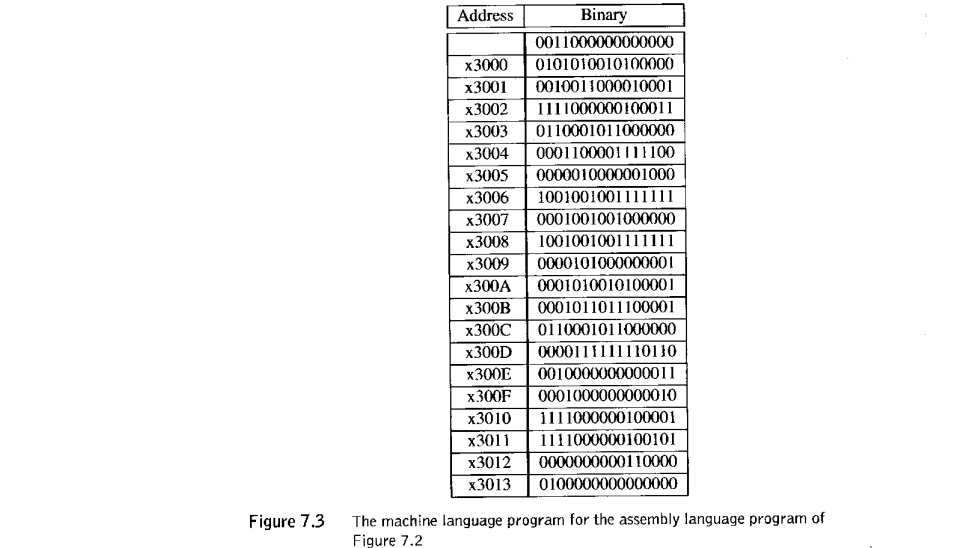

That process was, on a good day, merely tedious. Fortunately, you do not have to do it for a living—the LC-3 assembler does that. 

And, since you now know LC-3 assembly language, there is no need to program in machine language. 

Now we can write our programs symbolically in LC-3 assembly language and invoke the LC-3 assembler to create the machine language versions that can execute on an LC-3 computer. 

## 7.4 Beyond the Assembly of a Single Assembly Language Program 
### 7.4.1 The Executable Image 
When a computer begins execution of a program, the entity being executed is called an **executable image**. 

**The executable image is created from modules often created independently by several different programmers.**

Each module is translated separately into an object file.

Some modules are written by users, and some modules are supplied as library routines by the operating system. Each object file consists of instructions in the ISA of the computer being used, along with its associated data. 

The final step is to link all the object modules together into one executable image.

During execution of the program, the FETCH, DECODE, .. . instruction cycle is applied to instructions in the executable image. 

### 7.4.2 More than One Object File 
It is very common to form an executable image from more than one object file. 

In fact, in the real world, where most programs invoke libraries provided by the operating system as well as modules generated by other programmers, it is much more common to have multiple object files than a single one. 

At link time, when all the modules are combined, the **linker** (the program that manages the "combining" process) would use the symbol table entry for STARTofFILE in another module to complete the translation of our revised line 2E. 

In this way, the `.EXTERNAL` pseudo-op allows references by one module to symbolic locations in another module without a problem. The proper translations are resolved by the **linker**.